<a href="https://colab.research.google.com/github/450fausto/EstadisticaVerano/blob/main/practica02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/450fausto/EstadisticaVerano/refs/heads/main/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Coeficiente de correlación:  0.9782

Coeficiente de determinación:  0.9570

Intervalo de confianza para b1 de  95%
 8674.1187 < b1 <  10225.8059

valor-p de Shapiro:  0.1952

valor_p de Breusch-Pagan:  0.5276

para x = 4, y = [62648.05325234]
para x = 8, y = [100447.90253816]
para x = 20, y = [213847.45039562]



,df,sum_sq,mean_sq,F,PR(>F)
YearsExperience,1.0,2.085685e+10,2.085685e+10,622.507203,1.143068e-20
Residual,28.0,9.381286e+08,3.350459e+07,NaN,NaN


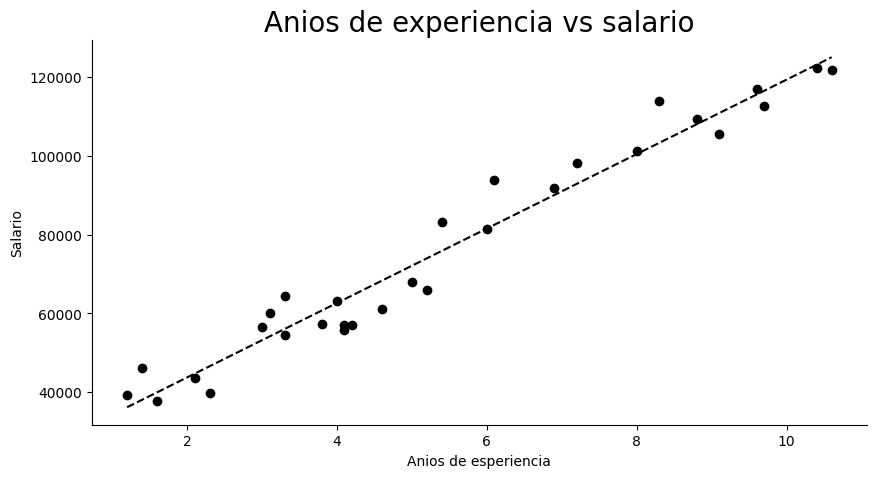

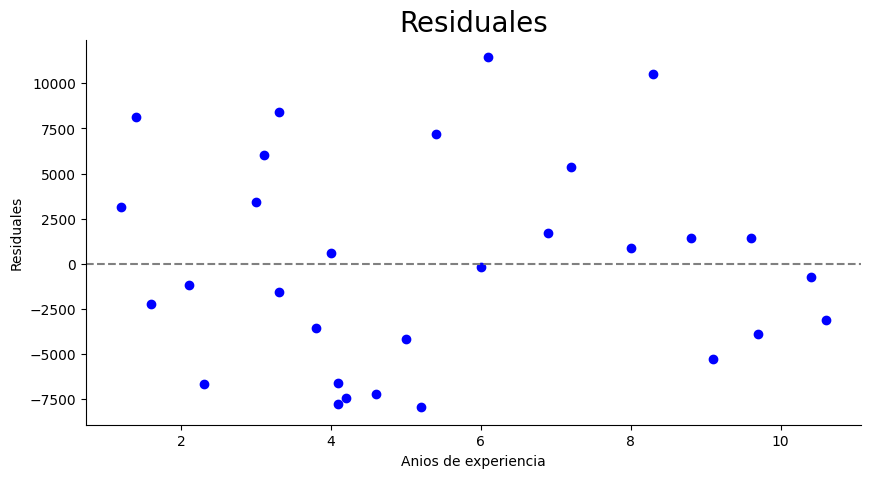

In [4]:
x = df["YearsExperience"]
y = df["Salary"]

# 2. Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5), dpi = 100)
plt.title("Anios de experiencia vs salario", fontsize = 20)
plt.scatter(x, y, label = "Salarios", color = 'black')
plt.xlabel('Anios de esperiencia') # nombrar eje x
plt.ylabel('Salario') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
yc = modelo.predict(x_constante)
plt.plot(x, yc, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure(figsize = (10, 5), dpi = 100)
plt.scatter(x, residuales, color = 'blue')
plt.title("Residuales", fontsize = 20)
plt.xlabel('Anios de experiencia')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
print(f'para x = 4, y = {modelo.predict([1, 4])}')
print(f'para x = 8, y = {modelo.predict([1, 8])}')
print(f'para x = 20, y = {modelo.predict([1, 20])}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Salary ~ YearsExperience', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova